#Importando bibliotecas

In [57]:
import pandas as pd
import json
import requests
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

#Carregando arquivo

In [58]:
url = "https://raw.githubusercontent.com/mauricioliveir/Telecom-X-parte-2/refs/heads/main/telecomx_data.csv"

df = pd.read_csv(url)

print("\nPrimeiras linhas do DataFrame:")
display(df.head())

print("\nInformações do DataFrame:")
display(df.info())

print("\n📈 Estatísticas descritivas:")
display(df.describe(include='all'))


Primeiras linhas do DataFrame:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Daily_Charges
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.156476
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.969099
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.429323
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.221565
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.758054



Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   int64  
 5   customer.Dependents        7043 non-null   int64  
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   int64  
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport 

None


📈 Estatísticas descritivas:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Daily_Charges
count,7043,7043.000000,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043,...,7043,7043,7043,7043,7043,7043.000000,7043,7043.000000,7043.000000,7043.000000
unique,7043,NaN,2,NaN,NaN,NaN,NaN,NaN,3,3,...,3,3,3,3,3,NaN,4,NaN,NaN,NaN
top,9995-HOTOH,NaN,Male,NaN,NaN,NaN,NaN,NaN,No,Fiber optic,...,No,No,No,No,Month-to-month,NaN,Electronic check,NaN,NaN,NaN
freq,1,NaN,3555,NaN,NaN,NaN,NaN,NaN,3390,3096,...,3095,3473,2810,2785,3875,NaN,2365,NaN,NaN,NaN
mean,NaN,0.265370,NaN,0.162147,0.483033,0.299588,32.371149,0.903166,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.592219,NaN,64.761692,2279.734304,2.128918
std,NaN,0.441561,NaN,0.368612,0.499748,0.458110,24.559481,0.295752,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.491457,NaN,30.090047,2266.794470,0.989153
min,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,18.250000,0.000000,0.599934
25%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,9.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,35.500000,398.550000,1.166995
50%,NaN,0.000000,NaN,0.000000,0.000000,0.000000,29.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,70.350000,1394.550000,2.312623
75%,NaN,1.000000,NaN,0.000000,1.000000,1.000000,55.000000,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,89.850000,3786.600000,2.953649


#Tratamento

In [59]:
df.drop(columns=['customerID'], inplace=True)

In [60]:
rename_columns = {
    'Churn': 'Cancelou',
    'customer.gender': 'Genero',
    'customer.SeniorCitizen': 'Idoso',
    'customer.Partner': 'TemParceiro',
    'customer.Dependents': 'TemDependentes',
    'customer.tenure': 'TempoContrato',
    'phone.PhoneService': 'TemTelefone',
    'phone.MultipleLines': 'VariasLinhas',
    'internet.InternetService': 'Internet',
    'internet.OnlineSecurity': 'SegurancaOnline',
    'internet.OnlineBackup': 'BackupOnline',
    'internet.DeviceProtection': 'ProtecaoDispositivo',
    'internet.TechSupport': 'SuporteTecnico',
    'internet.StreamingTV': 'TVStreaming',
    'internet.StreamingMovies': 'FilmesStreaming',
    'account.Contract': 'TipoContrato',
    'account.PaperlessBilling': 'BoletoDigital',
    'account.PaymentMethod': 'FormaPagamento',
    'account.Charges.Monthly': 'Mensalidade',
    'account.Charges.Total': 'TotalGasto',
    'Daily_Charges': 'GastoDiario'
}
df.rename(columns=rename_columns, inplace=True)

df['Genero'] = df['Genero'].map({'Female': 0, 'Male': 1})

colunas_para_arrumar = [
    'VariasLinhas', 'SegurancaOnline', 'BackupOnline',
    'ProtecaoDispositivo', 'SuporteTecnico', 'TVStreaming', 'FilmesStreaming'
]

for coluna in colunas_para_arrumar:
    df[coluna] = df[coluna].replace({
        'No internet service': 'No',
        'No phone service': 'No'
    })


binary_map = {'Yes': 1, 'No': 0}
colunas_binarias = [
    'VariasLinhas', 'SegurancaOnline', 'BackupOnline',
    'ProtecaoDispositivo', 'SuporteTecnico', 'TVStreaming', 'FilmesStreaming'
]

for coluna in colunas_binarias:
    df[coluna] = df[coluna].map(binary_map).astype(int)


colunas_dummies = ['Internet', 'TipoContrato', 'FormaPagamento']
df = pd.get_dummies(df, columns=colunas_dummies, drop_first=True, dtype=int)

print("\nColunas após tratamento:")
print(df.info())



Colunas após tratamento:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Cancelou                                7043 non-null   int64  
 1   Genero                                  7043 non-null   int64  
 2   Idoso                                   7043 non-null   int64  
 3   TemParceiro                             7043 non-null   int64  
 4   TemDependentes                          7043 non-null   int64  
 5   TempoContrato                           7043 non-null   int64  
 6   TemTelefone                             7043 non-null   int64  
 7   VariasLinhas                            7043 non-null   int64  
 8   SegurancaOnline                         7043 non-null   int64  
 9   BackupOnline                            7043 non-null   int64  
 10  ProtecaoDispositivo               

In [61]:
for x in df.columns:
  print(f'{x}: {df[x].unique()}')

Cancelou: [0 1]
Genero: [0 1]
Idoso: [0 1]
TemParceiro: [1 0]
TemDependentes: [1 0]
TempoContrato: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
TemTelefone: [1 0]
VariasLinhas: [0 1]
SegurancaOnline: [0 1]
BackupOnline: [1 0]
ProtecaoDispositivo: [0 1]
SuporteTecnico: [1 0]
TVStreaming: [1 0]
FilmesStreaming: [0 1]
BoletoDigital: [1 0]
Mensalidade: [65.6  59.9  73.9  ... 91.75 68.8  67.85]
TotalGasto: [ 593.3   542.4   280.85 ...  742.9  4627.65 3707.6 ]
GastoDiario: [2.156476   1.96909928 2.42932281 ... 3.01610782 2.26166995 2.2304405 ]
Internet_Fiber optic: [0 1]
Internet_No: [0 1]
TipoContrato_One year: [1 0]
TipoContrato_Two year: [0 1]
FormaPagamento_Credit card (automatic): [0 1]
FormaPagamento_Electronic check: [0 1]
FormaPagamento_Mailed check: [1 0]


#Verificando proporções

In [62]:
print("\nTaxa global de cancelamento:")
print(df['Cancelou'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')


Taxa global de cancelamento:
Cancelou
0    73.5%
1    26.5%
Name: proportion, dtype: object


In [63]:
binarias = ['Genero', 'Idoso', 'TemParceiro', 'TemDependentes', 'TemTelefone', 'BoletoDigital']
for col in binarias:
    taxa = df.groupby(col)['Cancelou'].mean().mul(100).round(1)
    print(f"\n {col}:")
    print(taxa.astype(str) + '%')


 Genero:
Genero
0    26.9%
1    26.2%
Name: Cancelou, dtype: object

 Idoso:
Idoso
0    23.6%
1    41.7%
Name: Cancelou, dtype: object

 TemParceiro:
TemParceiro
0    33.0%
1    19.7%
Name: Cancelou, dtype: object

 TemDependentes:
TemDependentes
0    31.3%
1    15.5%
Name: Cancelou, dtype: object

 TemTelefone:
TemTelefone
0    24.9%
1    26.7%
Name: Cancelou, dtype: object

 BoletoDigital:
BoletoDigital
0    16.3%
1    33.6%
Name: Cancelou, dtype: object


In [64]:
servicos = ['VariasLinhas', 'SegurancaOnline', 'BackupOnline', 'ProtecaoDispositivo',
            'SuporteTecnico', 'TVStreaming', 'FilmesStreaming']
for col in servicos:
    taxa = df.groupby(col)['Cancelou'].mean().mul(100).round(1)
    print(f"\n{col}:")
    print(taxa.astype(str) + '%')


VariasLinhas:
VariasLinhas
0    25.0%
1    28.6%
Name: Cancelou, dtype: object

SegurancaOnline:
SegurancaOnline
0    31.3%
1    14.6%
Name: Cancelou, dtype: object

BackupOnline:
BackupOnline
0    29.2%
1    21.5%
Name: Cancelou, dtype: object

ProtecaoDispositivo:
ProtecaoDispositivo
0    28.7%
1    22.5%
Name: Cancelou, dtype: object

SuporteTecnico:
SuporteTecnico
0    31.2%
1    15.2%
Name: Cancelou, dtype: object

TVStreaming:
TVStreaming
0    24.3%
1    30.1%
Name: Cancelou, dtype: object

FilmesStreaming:
FilmesStreaming
0    24.4%
1    29.9%
Name: Cancelou, dtype: object


In [65]:
contrato_pagamento = [
    'Internet_Fiber optic', 'Internet_No',
    'TipoContrato_One year', 'TipoContrato_Two year',
    'FormaPagamento_Credit card (automatic)', 'FormaPagamento_Electronic check'
]
for col in contrato_pagamento:
    taxa = df.groupby(col)['Cancelou'].mean().mul(100).round(1)
    print(f'{taxa.astype(str)}  %\n')

Internet_Fiber optic
0    14.5
1    41.9
Name: Cancelou, dtype: object  %

Internet_No
0    31.8
1     7.4
Name: Cancelou, dtype: object  %

TipoContrato_One year
0    30.6
1    11.3
Name: Cancelou, dtype: object  %

TipoContrato_Two year
0    34.1
1     2.8
Name: Cancelou, dtype: object  %

FormaPagamento_Credit card (automatic)
0    29.7
1    15.2
Name: Cancelou, dtype: object  %

FormaPagamento_Electronic check
0    17.1
1    45.3
Name: Cancelou, dtype: object  %



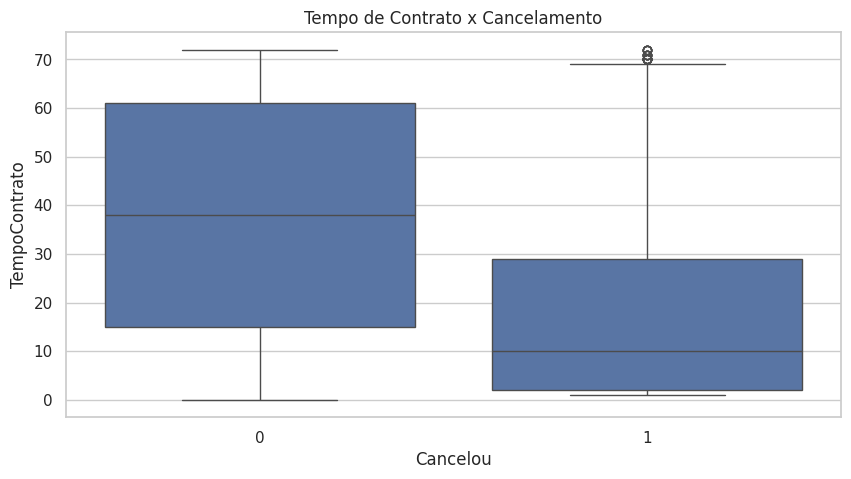

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x='Cancelou', y='TempoContrato', data=df)
plt.title("Tempo de Contrato x Cancelamento")
plt.show()

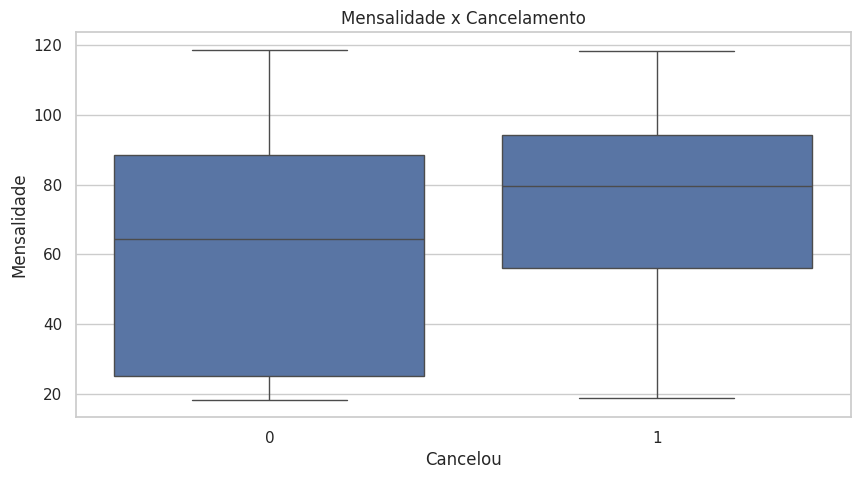

In [67]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Cancelou', y='Mensalidade', data=df)
plt.title("Mensalidade x Cancelamento")
plt.show()

#Balanceamento

In [68]:
print("Contagem original de 'Cancelou':")
print(df['Cancelou'].value_counts())

Contagem original de 'Cancelou':
Cancelou
0    5174
1    1869
Name: count, dtype: int64


In [69]:
from imblearn.over_sampling import SMOTE

X = df.drop('Cancelou', axis=1)
y = df['Cancelou']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

df_balanced = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Cancelou'])], axis=1)

print("\nContagem após SMOTE:")
print(df_balanced['Cancelou'].value_counts())


Contagem após SMOTE:
Cancelou
0    5174
1    5174
Name: count, dtype: int64


#Normalização

In [70]:
colunas_numericas = ['TempoContrato', 'Mensalidade', 'TotalGasto', 'GastoDiario']
df_original = df.copy()
df[colunas_numericas].describe()

,TempoContrato,Mensalidade,TotalGasto,GastoDiario
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,2.128918
std,24.559481,30.090047,2266.794470,0.989153
min,0.000000,18.250000,0.000000,0.599934
25%,9.000000,35.500000,398.550000,1.166995
50%,29.000000,70.350000,1394.550000,2.312623
75%,55.000000,89.850000,3786.600000,2.953649
max,72.000000,118.750000,8684.800000,3.903682


In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[colunas_numericas] = scaler.fit_transform(df[colunas_numericas])

print(df[colunas_numericas].head())

   TempoContrato  Mensalidade  TotalGasto  GastoDiario
0      -0.951682     0.027862   -0.744026     0.027862
1      -0.951682    -0.161583   -0.766482    -0.161583
2      -1.155283     0.303720   -0.881874     0.303720
3      -0.788800     1.104706   -0.459662     1.104706
4      -1.196004     0.636080   -0.887808     0.636080


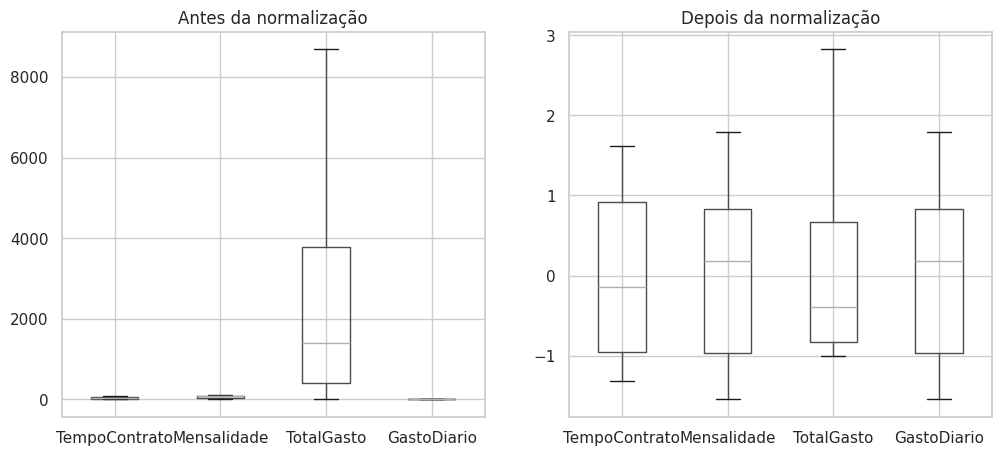

In [72]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Antes da normalização")
df_original[colunas_numericas].boxplot()

plt.subplot(1, 2, 2)
plt.title("Depois da normalização")
df[colunas_numericas].boxplot()
plt.show()

#Análise de correlação

In [73]:
target = 'Cancelou'

correlacoes = df.corr()[target].sort_values(key=abs, ascending=False)

tabela_corr = correlacoes.reset_index()
tabela_corr.columns = ['Variável', 'Correlação']

styled_table = (
    tabela_corr.style
    .background_gradient(cmap='coolwarm', subset=['Correlação'], vmin=-1, vmax=1)
    .format({'Correlação': '{:.2f}'})
    .set_properties(**{'text-align': 'center'})
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
)

styled_table


,Variável,Correlação
0,Cancelou,1.00
1,TempoContrato,-0.35
2,Internet_Fiber optic,0.31
3,TipoContrato_Two year,-0.30
4,FormaPagamento_Electronic check,0.30
5,Internet_No,-0.23
6,TotalGasto,-0.20
7,GastoDiario,0.19
8,Mensalidade,0.19
9,BoletoDigital,0.19


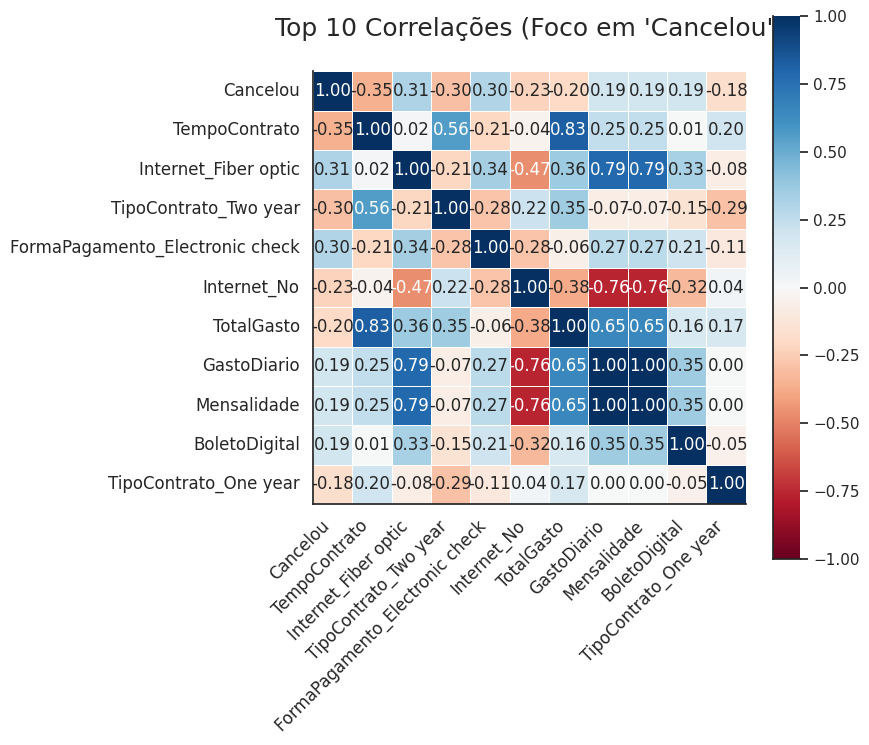

In [74]:
target = 'Cancelou'
corr_matrix = df.corr()

top_features = corr_matrix[target].abs().sort_values(ascending=False).head(11).index
corr_top = corr_matrix.loc[top_features, top_features]

sns.set_theme(style="white")

fig_size = max(8, len(top_features) * 0.8)
plt.figure(figsize=(fig_size, fig_size))

heatmap = sns.heatmap(
    corr_top,
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    center=0,
    vmin=-1, vmax=1,
    linewidths=0.5,
    annot_kws={"size": 12},
    square=True,
    cbar_kws={"shrink": 0.8}
)

plt.title(f"Top 10 Correlações (Foco em '{target}')", fontsize=18, pad=25)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()


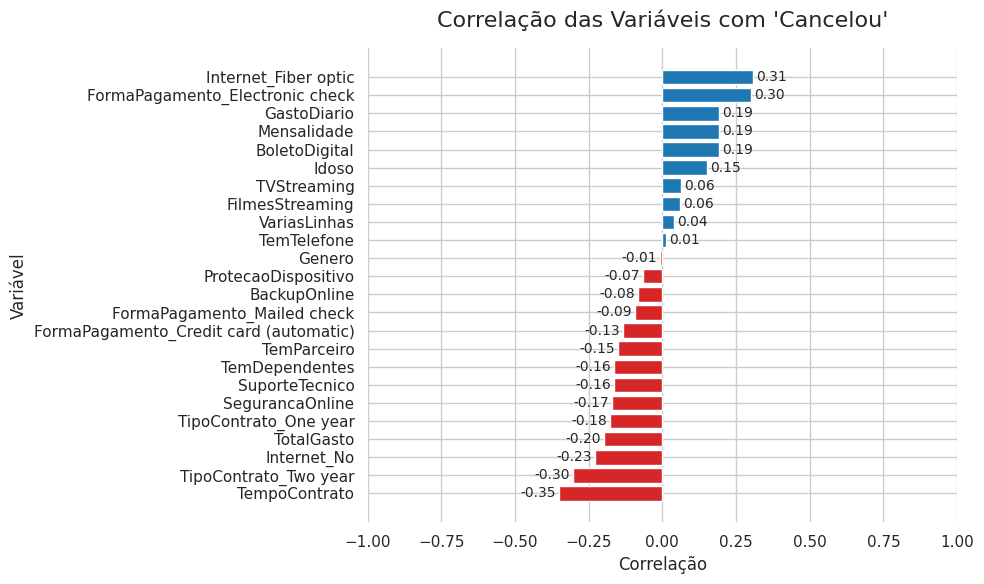

In [75]:
target = 'Cancelou'

correlacoes = df.corr()[target].drop(target).sort_values()

sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))

colors = ['#1f77b4' if val > 0 else '#d62728' for val in correlacoes]

bars = plt.barh(correlacoes.index, correlacoes, color=colors)


for bar, val in zip(bars, correlacoes):
    plt.text(val + (0.01 if val > 0 else -0.01),
             bar.get_y() + bar.get_height()/2,
             f"{val:.2f}",
             va='center',
             ha='left' if val > 0 else 'right',
             fontsize=10)

plt.title("Correlação das Variáveis com 'Cancelou'", fontsize=16, pad=15)
plt.xlabel("Correlação")
plt.ylabel("Variável")
plt.xlim(-1, 1)

sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

##Análises direcionadas

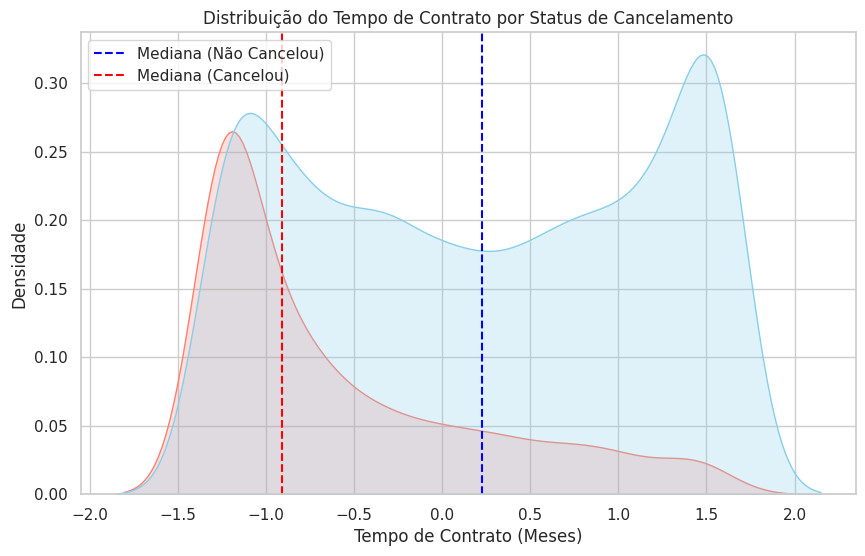

In [76]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='TempoContrato', hue='Cancelou', fill=True, palette=['skyblue', 'salmon'])
plt.axvline(df[df['Cancelou']==0]['TempoContrato'].median(), color='blue', linestyle='--', label='Mediana (Não Cancelou)')
plt.axvline(df[df['Cancelou']==1]['TempoContrato'].median(), color='red', linestyle='--', label='Mediana (Cancelou)')
plt.title("Distribuição do Tempo de Contrato por Status de Cancelamento")
plt.xlabel("Tempo de Contrato (Meses)")
plt.ylabel("Densidade")
plt.legend()
plt.show()

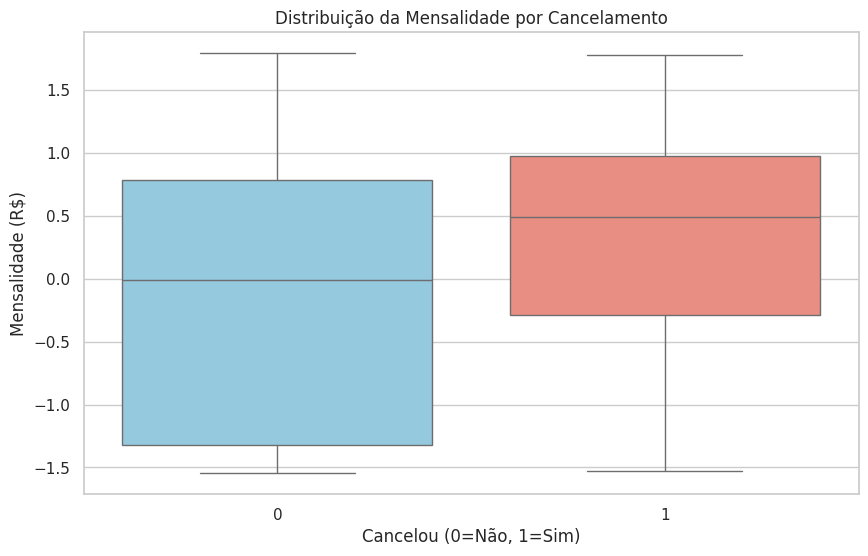

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Cancelou', y='Mensalidade', palette=['skyblue', 'salmon'])
plt.title("Distribuição da Mensalidade por Cancelamento")
plt.xlabel("Cancelou (0=Não, 1=Sim)")
plt.ylabel("Mensalidade (R$)")
plt.show()

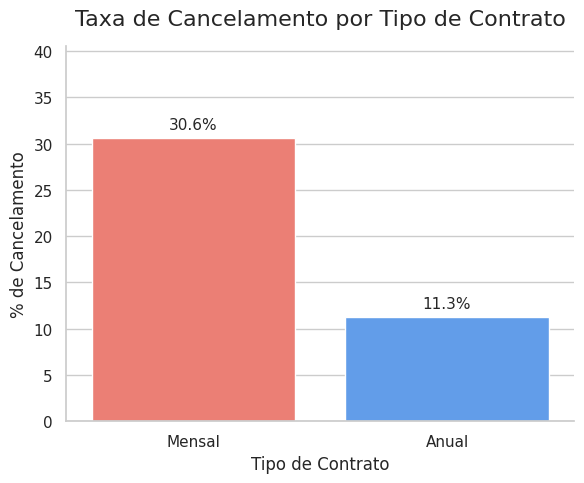

In [78]:
churn_por_contrato = (
    df.groupby('TipoContrato_One year')['Cancelou']
    .mean()
    .mul(100)
    .reset_index()
)

churn_por_contrato['TipoContrato_One year'] = churn_por_contrato['TipoContrato_One year'].map({0: 'Mensal', 1: 'Anual'})

sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 5))

palette = ["#4C9AFF" if v == churn_por_contrato['Cancelou'].min() else "#FF6F61" for v in churn_por_contrato['Cancelou']]

ax = sns.barplot(
    data=churn_por_contrato,
    x='TipoContrato_One year',
    y='Cancelou',
    palette=palette
)

for p in ax.patches:
    valor = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        valor + 1,
        f"{valor:.1f}%",
        ha='center',
        fontsize=11
    )

plt.title("Taxa de Cancelamento por Tipo de Contrato", fontsize=16, pad=15)
plt.xlabel("Tipo de Contrato")
plt.ylabel("% de Cancelamento")
plt.ylim(0, max(churn_por_contrato['Cancelou']) + 10)
sns.despine()
plt.tight_layout()
plt.show()

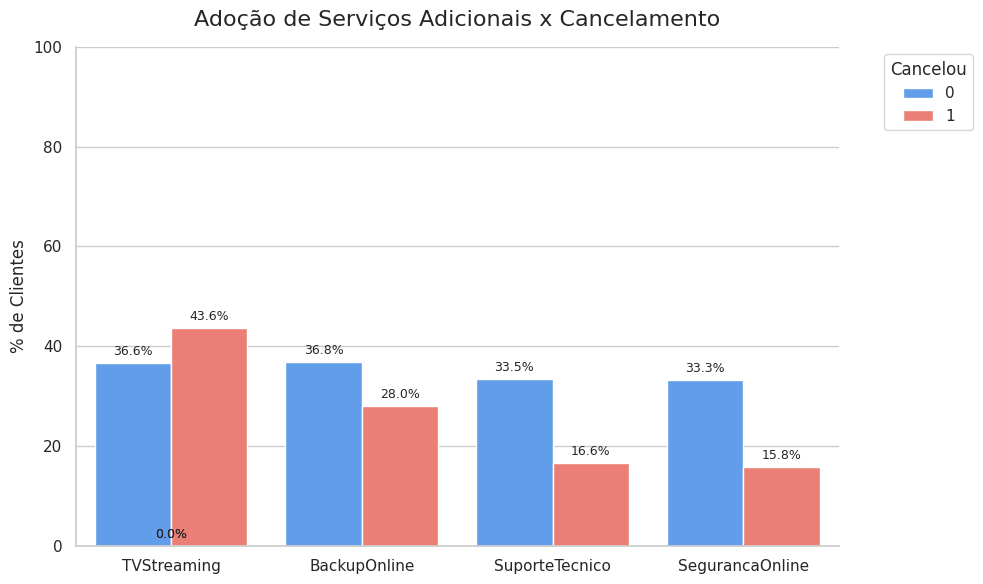

In [79]:
servicos = ['SegurancaOnline', 'BackupOnline', 'SuporteTecnico', 'TVStreaming']

churn_servicos = df.groupby('Cancelou')[servicos].mean().T * 100
churn_servicos.index.name = 'Serviço'

churn_servicos['Média'] = churn_servicos.mean(axis=1)
churn_servicos = churn_servicos.sort_values('Média', ascending=False).drop(columns='Média')

churn_servicos_long = churn_servicos.reset_index().melt(id_vars='Serviço', var_name='Cancelou', value_name='Percentual')

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

palette = {0: "#4C9AFF", 1: "#FF6F61"}

ax = sns.barplot(
    data=churn_servicos_long,
    x='Serviço',
    y='Percentual',
    hue='Cancelou',
    palette=palette
)

for p in ax.patches:
    valor = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        valor + 1,        f"{valor:.1f}%",
        ha='center', va='bottom', fontsize=9
    )

plt.title("Adoção de Serviços Adicionais x Cancelamento", fontsize=16, pad=15)
plt.ylabel("% de Clientes")
plt.xlabel("")
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.legend(title="Cancelou", bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()

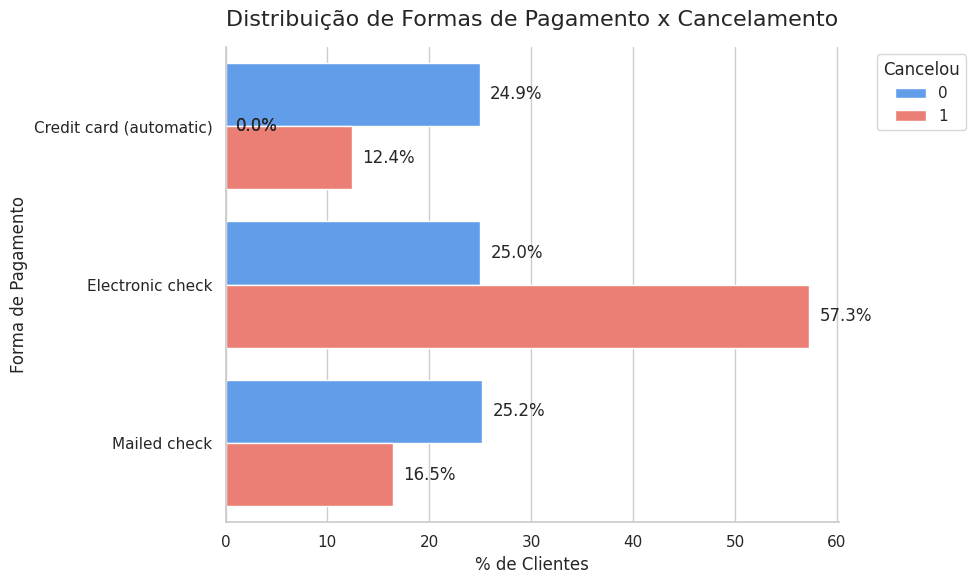

In [80]:
pagamento_cols = [col for col in df.columns if 'FormaPagamento_' in col]

churn_pagamento = df.groupby('Cancelou')[pagamento_cols].mean().T * 100
churn_pagamento.index = [col.replace('FormaPagamento_', '') for col in churn_pagamento.index]

churn_pagamento = churn_pagamento.reset_index().melt(id_vars='index', var_name='Cancelou', value_name='Percentual')
churn_pagamento.rename(columns={'index': 'Forma de Pagamento'}, inplace=True)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

palette = {0: "#4C9AFF", 1: "#FF6F61"}

ax = sns.barplot(
    data=churn_pagamento,
    x='Percentual',
    y='Forma de Pagamento',
    hue='Cancelou',
    palette=palette
)

for p in ax.patches:
    value = f"{p.get_width():.1f}%"
    ax.text(
        p.get_width() + 1,
        p.get_y() + p.get_height() / 2,
        value,
        va='center'
    )

plt.title("Distribuição de Formas de Pagamento x Cancelamento", fontsize=16, pad=15)
plt.xlabel("% de Clientes")
plt.ylabel("Forma de Pagamento")
plt.legend(title="Cancelou", bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()


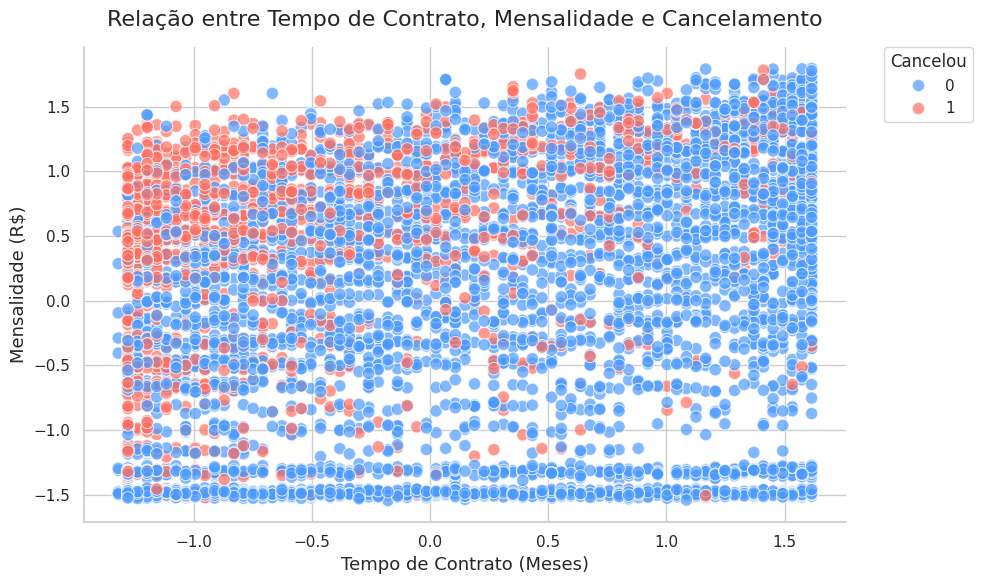

In [81]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df,
    x='TempoContrato',
    y='Mensalidade',
    hue='Cancelou',
    palette={0: "#4C9AFF", 1: "#FF6F61"},
    alpha=0.7,
    s=80,
    edgecolor='white',
    linewidth=0.8
)

plt.title("Relação entre Tempo de Contrato, Mensalidade e Cancelamento", fontsize=16, pad=15)
plt.xlabel("Tempo de Contrato (Meses)", fontsize=13)
plt.ylabel("Mensalidade (R$)", fontsize=13)

plt.legend(title="Cancelou", bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

sns.despine()

plt.tight_layout()
plt.show()

#Criando Modelo

##Separação das variáveis

In [82]:
X = df.drop(['Cancelou'], axis=1)
y = df['Cancelou']

print(f"Shape de X: {X.shape}, Shape de y: {y.shape}")

Shape de X: (7043, 24), Shape de y: (7043,)


##Divisão treino teste

In [83]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Treino: {X_train.shape}, Teste: {X_test.shape}")

Treino: (4930, 24), Teste: (2113, 24)


In [84]:
print("Colunas em X_train:", X_train.columns.tolist())
print("\nValores únicos em y_train:", y_train.unique())

Colunas em X_train: ['Genero', 'Idoso', 'TemParceiro', 'TemDependentes', 'TempoContrato', 'TemTelefone', 'VariasLinhas', 'SegurancaOnline', 'BackupOnline', 'ProtecaoDispositivo', 'SuporteTecnico', 'TVStreaming', 'FilmesStreaming', 'BoletoDigital', 'Mensalidade', 'TotalGasto', 'GastoDiario', 'Internet_Fiber optic', 'Internet_No', 'TipoContrato_One year', 'TipoContrato_Two year', 'FormaPagamento_Credit card (automatic)', 'FormaPagamento_Electronic check', 'FormaPagamento_Mailed check']

Valores únicos em y_train: [1 0]


##Regressão Logística

In [85]:
from sklearn.linear_model import LogisticRegression

modelo_lr = LogisticRegression(class_weight='balanced', max_iter=1000)
modelo_lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

##Random Forest

In [86]:
from sklearn.ensemble import RandomForestClassifier

modelo_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

##XGBoost

In [87]:
from xgboost import XGBClassifier

scale_pos_weight = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

modelo_xgb = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
modelo_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

#Avaliar os modelos


 Regressão Logística:

Métricas de Avaliação:
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1562
           1       0.50      0.80      0.62       551

    accuracy                           0.74      2113
   macro avg       0.71      0.76      0.71      2113
weighted avg       0.80      0.74      0.76      2113

AUC-ROC: 0.76


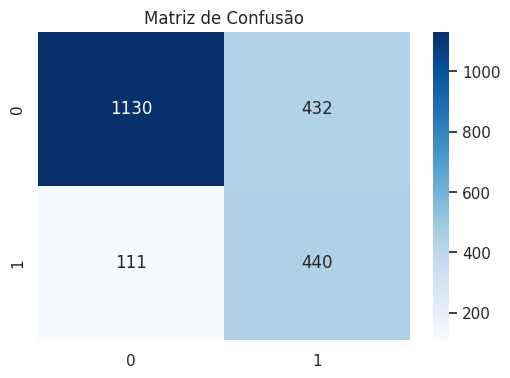


 Random Forest:

Métricas de Avaliação:
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1562
           1       0.65      0.45      0.54       551

    accuracy                           0.80      2113
   macro avg       0.74      0.68      0.70      2113
weighted avg       0.78      0.80      0.78      2113

AUC-ROC: 0.68


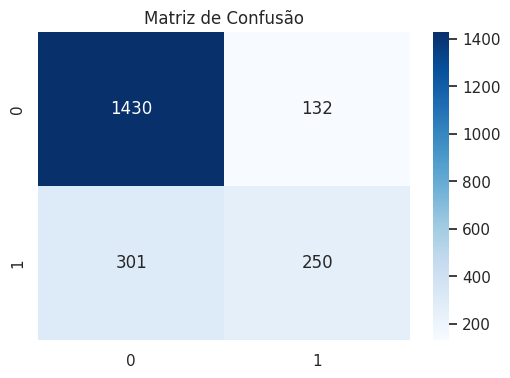


 XGBoost:

Métricas de Avaliação:
              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1562
           1       0.55      0.70      0.62       551

    accuracy                           0.77      2113
   macro avg       0.72      0.75      0.73      2113
weighted avg       0.80      0.77      0.78      2113

AUC-ROC: 0.75


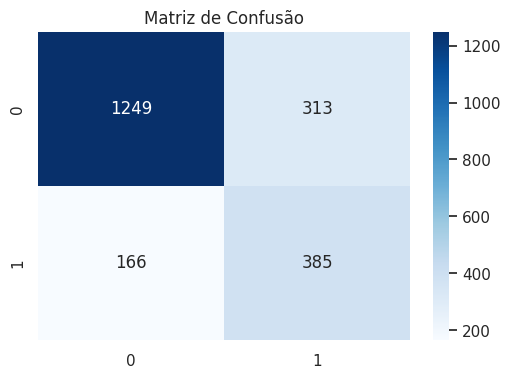

In [88]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def avaliar_modelo(modelo, X_test, y_test):
    y_pred = modelo.predict(X_test)
    print("\nMétricas de Avaliação:")
    print(classification_report(y_test, y_pred))

    print(f"AUC-ROC: {roc_auc_score(y_test, y_pred):.2f}")

    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title("Matriz de Confusão")
    plt.show()

print("\n Regressão Logística:")
avaliar_modelo(modelo_lr, X_test, y_test)

print("\n Random Forest:")
avaliar_modelo(modelo_rf, X_test, y_test)

print("\n XGBoost:")
avaliar_modelo(modelo_xgb, X_test, y_test)

#Importância das variáveis

##Regressão Logística

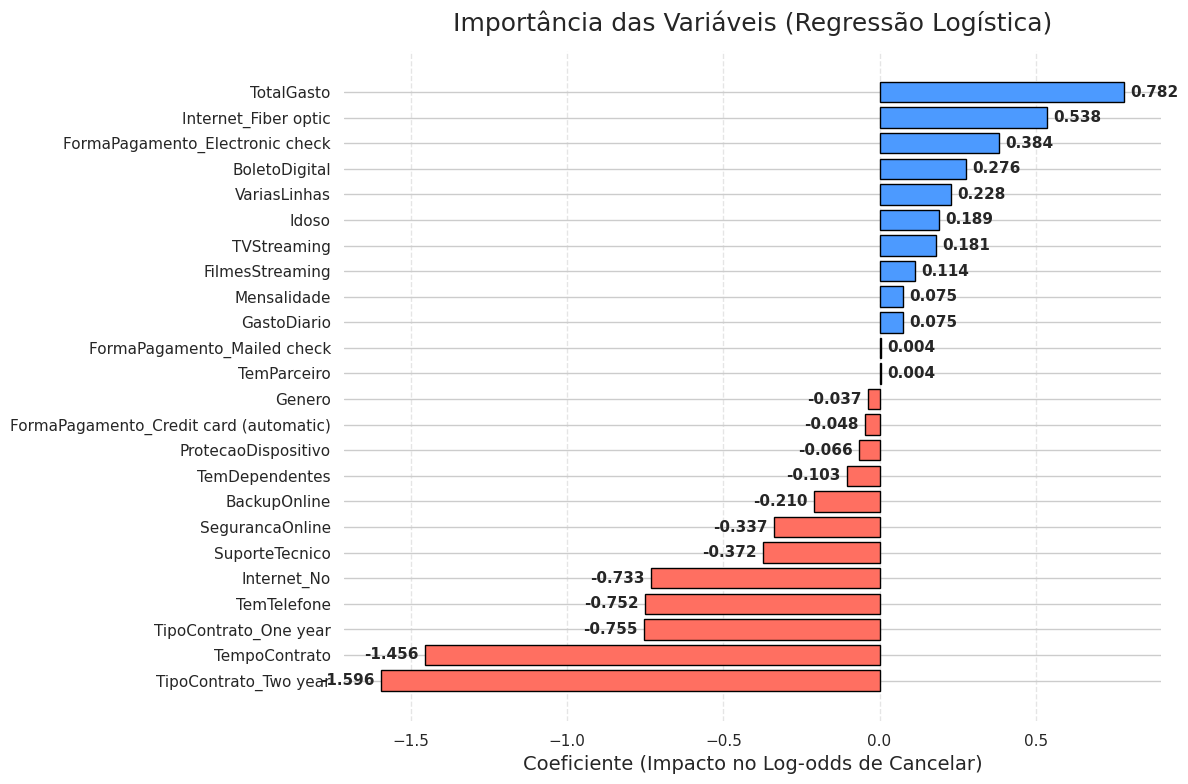

In [89]:
coeficientes = pd.DataFrame({
    'Variável': X_train.columns,
    'Coeficiente': modelo_lr.coef_[0]
})
coeficientes['abs_coef'] = coeficientes['Coeficiente'].abs()
coeficientes = coeficientes.sort_values('Coeficiente')

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8))

colors = coeficientes['Coeficiente'].apply(lambda x: '#4C9AFF' if x > 0 else '#FF6F61')

bars = plt.barh(coeficientes['Variável'], coeficientes['Coeficiente'], color=colors, edgecolor='black')

plt.title('Importância das Variáveis (Regressão Logística)', fontsize=18, pad=15)
plt.xlabel('Coeficiente (Impacto no Log-odds de Cancelar)', fontsize=14)
plt.ylabel('')

plt.grid(axis='x', linestyle='--', alpha=0.5)
sns.despine(left=True, bottom=True)


for bar in bars:
    width = bar.get_width()
    plt.text(
        width + (0.02 if width > 0 else -0.02),
        bar.get_y() + bar.get_height() / 2,
        f'{width:.3f}',
        ha='left' if width > 0 else 'right',
        va='center',
        fontsize=11,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

#Conclusão

Comparação dos Modelos

<table>
  <thead>
    <tr>
      <th>Métrica</th>
      <th>Regressão Logística</th>
      <th>Random Forest</th>
      <th>XGBoost</th>
      <th>Observação</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Recall (Churn=1)</td>
      <td>80%</td>
      <td>45%</td>
      <td>70%</td>
      <td>Regressão captura mais cancelamentos reais.</td>
    </tr>
    <tr>
      <td>Precision (Churn=1)</td>
      <td>50%</td>
      <td>65%</td>
      <td>55%</td>
      <td>RF tem menos falsos positivos.</td>
    </tr>
    <tr>
      <td>AUC-ROC</td>
      <td>0.76</td>
      <td>0.68</td>
      <td>0.75</td>
      <td>Regressão e XGBoost discriminam melhor as classes.</td>
    </tr>
  </tbody>
</table>



<h2>Interpretação Estratégica</h2>

<ol>
  <li>
    <strong>Prioridade: Maximizar Recall (Churn=1)</strong><br>
    Regressão Logística é a melhor para detectar clientes que vão cancelar (Recall=80%), mas com muitos falsos positivos (Precision=50%).<br><br>
    <em>Ação:</em> Use esse modelo para alertas precoces e direcione ações de retenção para os clientes identificados (mesmo que haja "falsos alarmes").
  </li>
  <li>
    <strong>Custo dos Falsos Positivos</strong><br>
    Random Forest tem a menor taxa de falsos positivos (Precision=65%), mas pega poucos cancelamentos reais (Recall=45%).<br><br>
    <em>Ação:</em> Ideal para cenários onde intervenções de retenção são caras (ex: ofertas de desconto agressivas).
  </li>
  <li>
    <strong>Equilíbrio: XGBoost</strong><br>
    Combina Recall razoável (70%) e Precision aceitável (55%).<br><br>
    <em>Ação:</em> Use para ações de retenção de custo médio (ex: programas de fidelidade).
  </li>
</ol>

In [90]:
%%html
<table style="border-collapse: collapse; width: 100%; max-width: 900px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;">
  <thead>
    <tr>
      <th style="text-align:left; padding:10px 12px; background:#0f172a; color: #fff; border-radius:8px 8px 0 0;">Variável</th>
      <th style="text-align:left; padding:10px 12px; background:#0f172a; color: #fff;">Regressão Logística</th>
      <th style="text-align:left; padding:10px 12px; background:#0f172a; color: #fff;">Random Forest</th>
      <th style="text-align:left; padding:10px 12px; background:#0f172a; color: #fff;">XGBoost</th>
      <th style="text-align:left; padding:10px 12px; background:#0f172a; color: #fff; border-radius:8px 8px 0 0;">Consenso</th>
    </tr>
  </thead>
  <tbody>
    <tr style="background:#fbfbfb;">
      <td style="padding:10px 12px; border-bottom:1px solid #e6e6e6;"><strong>TempoContrato</strong></td>
      <td style="padding:10px 12px; border-bottom:1px solid #e6e6e6;">🔴 <span style="color:#c92a2a;">Coef. negativo</span></td>
      <td style="padding:10px 12px; border-bottom:1px solid #e6e6e6;"><span style="color:#000;">🏆 <strong>Top 1</strong></span></td>
      <td style="padding:10px 12px; border-bottom:1px solid #e6e6e6;"><span style="color:#000;">🏆 <strong>Top 1</strong></span></td>
      <td style="padding:10px 12px; border-bottom:1px solid #e6e6e6;"><span style="color:#000;">✅ <em>Fator crítico</em></span></td>
    </tr>
    <tr style="background:#fff;">
      <td style="padding:10px 12px; border-bottom:1px solid #e6e6e6;"><strong>Mensalidade</strong></td>
      <td style="padding:10px 12px; border-bottom:1px solid #e6e6e6;">🔴 <span style="color:#c92a2a;">Coef. positivo</span></td>
      <td style="padding:10px 12px; border-bottom:1px solid #e6e6e6;"><span style="color:#000;">🏆 <strong>Top 3</strong></span></td>
      <td style="padding:10px 12px; border-bottom:1px solid #e6e6e6;"><span style="color:#000;">🏆 <strong>Top 2</strong></span></td>
      <td style="padding:10px 12px; border-bottom:1px solid #e6e6e6;"><span style="color:#000;">✅ <em>Aumenta Churn</em></span></td>
    </tr>
    <tr style="background:#fbfbfb;">
      <td style="padding:10px 12px; border-bottom:1px solid #e6e6e6;"><strong>Contrato Anual</strong></td>
      <td style="padding:10px 12px; border-bottom:1px solid #e6e6e6;">🔵 <span style="color:#1e6fb3;">Coef. negativo</span></td>
      <td style="padding:10px 12px; border-bottom:1px solid #e6e6e6;"><span style="color:#000;">🏆 <strong>Top 5</strong></span></td>
      <td style="padding:10px 12px; border-bottom:1px solid #e6e6e6;"><span style="color:#000;">🏆 <strong>Top 5</strong></span></td>
      <td style="padding:10px 12px; border-bottom:1px solid #e6e6e6;"><span style="color:#000;">✅ <em>Reduz Churn</em></span></td>
    </tr>
    <tr style="background:#fff;">
      <td style="padding:10px 12px; border-bottom:1px solid #e6e6e6;"><strong>SegurancaOnline</strong></td>
      <td style="padding:10px 12px; border-bottom:1px solid #e6e6e6;">🔵 <span style="color:#1e6fb3;">Coef. negativo</span></td>
      <td style="padding:10px 12px; border-bottom:1px solid #e6e6e6;"><span style="color:#000;">🏆 <strong>Top 10</strong></span></td>
      <td style="padding:10px 12px; border-bottom:1px solid #e6e6e6;"><span style="color:#000;">🏆 <strong>Top 8</strong></span></td>
      <td style="padding:10px 12px; border-bottom:1px solid #e6e6e6;"><span style="color:#000;">⚠️ <em>Importante, mas não decisivo</em></span></td>
    </tr>
  </tbody>
</table>


Variável,Regressão Logística,Random Forest,XGBoost,Consenso
TempoContrato,🔴 Coef. negativo,🏆 Top 1,🏆 Top 1,✅ Fator crítico
Mensalidade,🔴 Coef. positivo,🏆 Top 3,🏆 Top 2,✅ Aumenta Churn
Contrato Anual,🔵 Coef. negativo,🏆 Top 5,🏆 Top 5,✅ Reduz Churn
SegurancaOnline,🔵 Coef. negativo,🏆 Top 10,🏆 Top 8,"⚠️ Importante, mas não decisivo"


<h2>Insights para Negócio</h2>

<p><strong>Clientes com maior risco de churn (Regressão Logística):</strong></p>
<ul>
  <li>Características comuns:</li>
  <ul>
    <li>Mensalidade alta (coeficiente positivo no modelo).</li>
    <li>Contrato mensal (vs. anual).</li>
    <li>Sem serviços adicionais (ex: segurança online).</li>
  </ul>
  <li><em>Ação:</em> Oferecer desconto condicional (ex: 15% de desconto por 6 meses se assinar um contrato anual).</li>
</ul>

<p><strong>Otimizar custo-benefício (XGBoost):</strong></p>
<p>Falsos positivos podem receber ofertas de baixo custo (ex: e-mail personalizado com dicas de uso do serviço).</p>

<p><strong>Evitar intervenções desnecessárias (Random Forest):</strong></p>
<p>Clientes classificados como "risco" por esse modelo têm alta probabilidade real de churn.<br>
<em>Ação:</em> Priorize contato humano (ex: ligação do time de retenção).</p>

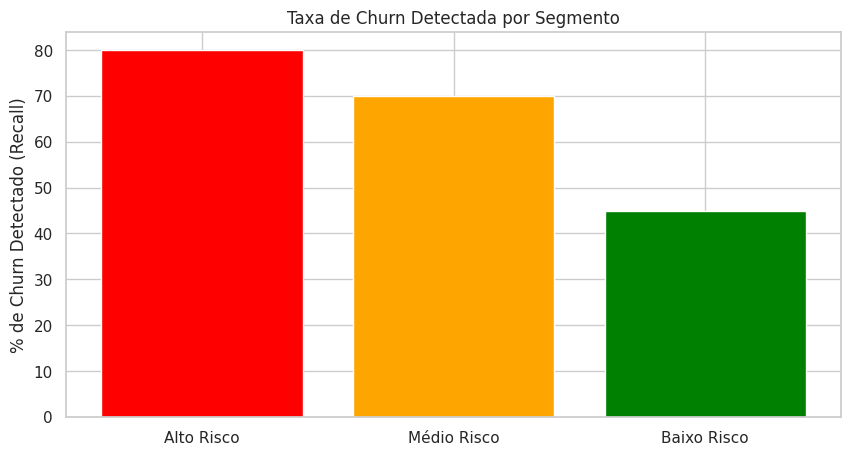

In [91]:
segmentos = ['Alto Risco', 'Médio Risco', 'Baixo Risco']
taxa_churn = [80, 70, 45]
custo_intervencao = [100, 50, 10]

plt.figure(figsize=(10, 5))
plt.bar(segmentos, taxa_churn, color=['red', 'orange', 'green'])
plt.title("Taxa de Churn Detectada por Segmento")
plt.ylabel("% de Churn Detectado (Recall)")
plt.show()

#Exportando modelos

In [92]:
import pickle

def exportar_modelo(modelo, nome_arquivo):
    with open(nome_arquivo, 'wb') as arquivo:
        pickle.dump(modelo, arquivo)

exportar_modelo(modelo_lr, 'modelo_lr.pkl')
exportar_modelo(modelo_rf, 'modelo_rf.pkl')
exportar_modelo(modelo_xgb, 'modelo_xgb.pkl')